# HW10 Kernels and Neural Networks

### Q1. (4 points) 

#### a) This question looks at the idea of kernels, which are useful for SVM and in general. Understanding kernels better would serve you well for neural networks too. Load the plots in the cell below. Can you separate the classes with a hyperplane? Explain. If not, make your function separate the different classes in each part by changing the representation of the data—in other words, by projecting the data to a (potentially nonlinear) space, where separatation using a hyperplane would be possible. The classes are designated by different colors: red and blue in Part A and red, blue, and green in Part B. 


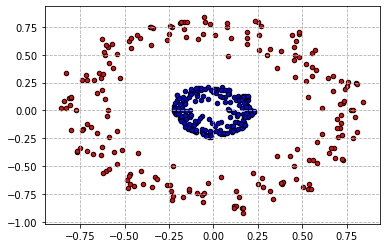

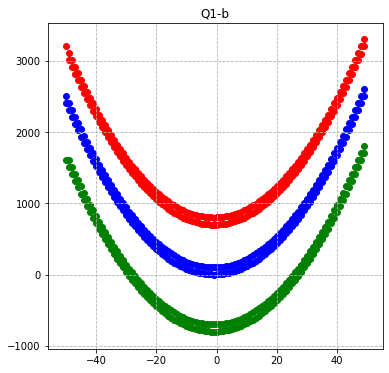

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles


####### part a
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.2, noise=.05)
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
reds = y == 0
blues = y == 1
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.grid(linestyle='--')

####### part b
data = np.loadtxt('data/data1.csv')
plt.figure(figsize=(6, 6))
plt.scatter(data[:200, 0], data[:200, 1], c = 'blue')
plt.scatter(data[201:400, 0], data[201:400, 1], c = 'red')
plt.scatter(data[401:, 0], data[401:, 1], c = 'green')
plt.grid(linestyle='--')
plt.title('Q1-b')
plt.show()



No, you are not able to separate the data with just a hyperplane, you must project this data into either a non-linear
coordinate system, such as polar coordinates, or into a higher dimension to be separable.
There is simply no linear separation that can be drawn in 2 dimensions for this data set.

Below are a polar and a 3d projection for separating the data.

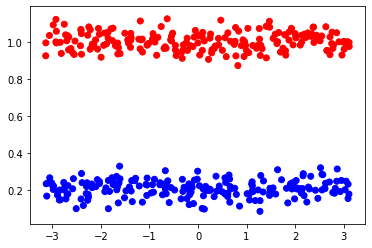

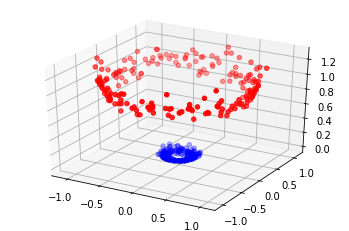

In [22]:
#### code here for figure(a)
first = X[:, 0].reshape((-1, 1))
second = X[:, 1].reshape((-1, 1))
radius = np.sqrt(first**2+second**2)
theta = np.arctan2(second, first)

colors = []
for i in range(len(y)):
    if y[i] == 0:
        colors.append('red')
    else:
        colors.append('blue')

fig = plt.figure()
polarAXis = fig.add_subplot(111)
polarAXis.scatter(theta, radius, c=colors)
plt.show()

third = (first ** 2 + second ** 2)
descriptors = np.hstack((X, third))

fig = plt.figure()
thirdDimAxis = fig.add_subplot(111, projection='3d')
thirdDimAxis.scatter(first, second, third, c=colors, depthshade=True)
plt.show()

Again,  there is not a linear method to separate the three graphs without first projecting the graphs into a 3d space.
Because each of these were parabolic, it was easy enough to use their minima to project the parabola into a 3d space as shown below.

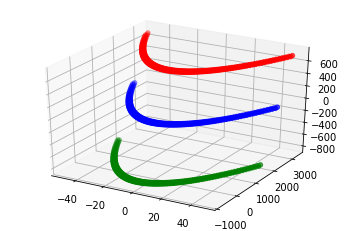

In [23]:
#### code here for figure(b)
blueX, blueY, blueZ = data[:200, 0], data[:200, 1], np.ones(len(data[:200, 1]))*min(data[:200, 1])
redX, redY, redZ = data[201:400, 0], data[201:400, 1], np.ones(len(data[201:400, 1]))*min(data[201:400, 1])
greenX, greenY, greenZ = data[401:, 0], data[401:, 1], np.ones(len(data[401:, 1]))*min(data[401:, 1])

ax = plt.axes(projection='3d')
ax.scatter3D(blueX, blueY, blueZ, c='blue', cmap='Blues')
ax.scatter3D(redX, redY, redZ, c='red', cmap='Reds')
ax.scatter3D(greenX, greenY, greenZ, c='green', cmap='Greens')
plt.show()

### Q2. (4 points) 

#### a) The Perceptron algorithm is the simplest type of artificial neural network. Implement the perceptron below.

In [24]:
#### code here 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def train_perceptron(descriptor, target, threshold=0.01, learnRate=0.1, iterations=10):
    weights = np.zeros(len(descriptor[0]))
    estimates = np.ones(len(target))
    adjustedErrors = []
    for _ in range(0, iterations):
        for i in range(0, len(descriptor)):

            f = np.dot(descriptor[i], weights)
            if f >= threshold:
                estimate = 1.
            else:
                estimate = 0.
            estimates[i] = estimate
            for j in range(0, len(weights)):
                weights[j] = weights[j] + learnRate * (target[i] - estimate) * descriptor[i][j]

        errors = np.ones(len(target))
        for i in range(0, len(target)):
            errors[i] = (target[i] - estimates[i]) ** 2
        adjustedErrors.append(0.5 * np.sum(errors))

    return weights, adjustedErrors


def test_perceptron(descriptor, weight, threshold=0.01):
    predictions = []
    for i in range(0, len(descriptor - 1)):
        f = np.dot(descriptor[i], weight)
        if f > threshold:
            prediction = 1
        else:
            prediction = 0
        predictions.append(prediction)
    return predictions


def create_descriptor(descriptor, weights):
    w0 = weights[0]
    w1 = weights[1]
    w2 = weights[2]
    outputDescriptor = []
    for idx in range(0, len(descriptor - 1)):
        x2_temp = (-w0 - w1 * descriptor[idx]) / w2
        outputDescriptor.append(x2_temp)
    return outputDescriptor

#### b) Now run the below cell. Can your implemented perceptron separate the below data(X)? If it can, how many iterations did it take. If it took a lot of iterations, speculate on why that happens. If it cannot, explain why not.

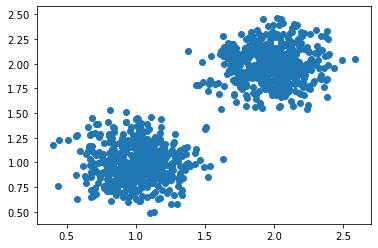

In [25]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
centers = [[1, 1],  [2,2]]
X, y = make_blobs(n_samples=1000, centers=centers, cluster_std=0.2)

plt.scatter(X[:,0], X[:,1])

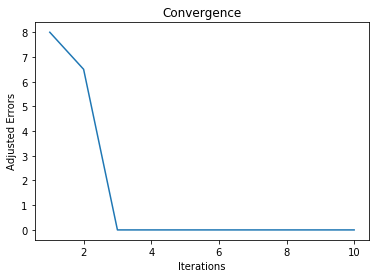

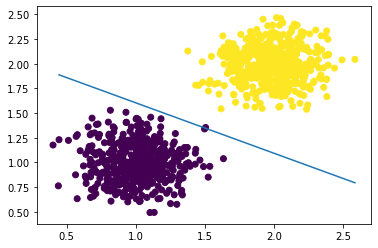

In [26]:
#### code here for Q2-b
sampleSize = 1000  # based on n_samples
intercept = np.ones((sampleSize, 1))
x = np.hstack((intercept, X))
trainDescriptors, testDescriptors, trainTarget, testTarget = train_test_split(x, y, test_size=0.3)

trainingWeights, trainingErrors = train_perceptron(trainDescriptors, trainTarget)
iterations = np.linspace(1, len(trainingErrors), len(trainingErrors))


plt.figure(1)
plt.plot(iterations, trainingErrors)
plt.xlabel('Iterations')
plt.ylabel('Adjusted Errors')
plt.title('Convergence')
plt.show()

predictedValues = test_perceptron(testDescriptors, trainingWeights)
minDescriptor = np.min(testDescriptors[:, 1])
maxDescriptor = np.max(testDescriptors[:, 1])
firstDescriptor = np.linspace(minDescriptor, maxDescriptor, 100)
secondDescriptor = np.asarray(create_descriptor(firstDescriptor, trainingWeights))
plt.scatter(x[:, 1], x[:, 2], c=y)
plt.plot(firstDescriptor, secondDescriptor)
plt.show()

Yes, my perceptron was able to separate the data provided as it was easily, linearly separable.
I set my perceptron to a maximum of 10 iterations, but based on the graph of the convergence,
it took about 3 to 5 iterations at most to properly classify the data. In this case, it was relatively quick as the classes
were pretty clearly separated without much data shared data between them.

### Q3. (2 points)

#### Can your perceptron from Q2a seperate XOR and XNOR? Explain why it can or cannot.


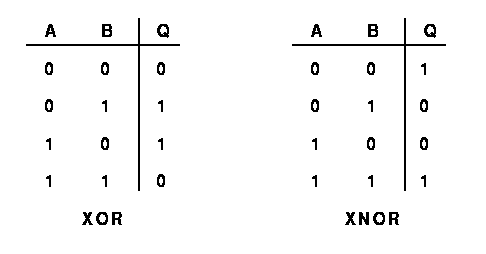

In [27]:
from IPython.display import Image
Image("data/XORXNOR.png")

No, in order to predict XOR and XNOR we need to combine a minimum of two perceptrons as XOR and XNOR are combinations of
boolean AND, OR, NAND/ AND, NOR, OR. We cannot predict the combination of those three logic gates with a single perceptron,
we need at least two in order to get the proper output.